In [4]:
import yfinance as yf
from datetime import date, timedelta


import math 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras. layers import Dense, LSTM

# switch to u_input 
ticker = 'MSFT'
s_date = date.today() - timedelta(days = 1825)
l_date = date.today()

# fetch date and save as csv file and read
stock = yf.Ticker(ticker)
df = stock.history(start=s_date, end=l_date)

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-07-29 00:00:00-04:00,134.947918,134.957449,132.916541,134.499680,16605900,0.0,0.0
2019-07-30 00:00:00-04:00,133.650899,134.680892,133.326646,133.851181,16846500,0.0,0.0
2019-07-31 00:00:00-04:00,133.832084,133.984679,128.825183,129.960083,38598800,0.0,0.0
2019-08-01 00:00:00-04:00,130.656306,134.413869,130.589540,131.667221,40557500,0.0,0.0
2019-08-02 00:00:00-04:00,131.695813,131.915174,128.996853,130.560913,30791600,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-19 00:00:00-04:00,433.100006,441.140015,432.000000,437.109985,20940400,0.0,0.0
2024-07-22 00:00:00-04:00,441.790009,444.600006,438.910004,442.940002,15808800,0.0,0.0
2024-07-23 00:00:00-04:00,443.899994,448.390015,443.100006,444.850006,13107100,0.0,0.0


In [10]:
df.index

Index([2019-07-29, 2019-07-30, 2019-07-31, 2019-08-01, 2019-08-02, 2019-08-05,
       2019-08-06, 2019-08-07, 2019-08-08, 2019-08-09,
       ...
       2024-07-12, 2024-07-15, 2024-07-16, 2024-07-17, 2024-07-18, 2024-07-19,
       2024-07-22, 2024-07-23, 2024-07-24, 2024-07-25],
      dtype='object', length=1257)

In [11]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2019-07-29,134.947918,134.957449,132.916541,134.499680,16605900,0.0,0.0
2019-07-30,133.650899,134.680892,133.326646,133.851181,16846500,0.0,0.0
2019-07-31,133.832084,133.984679,128.825183,129.960083,38598800,0.0,0.0
2019-08-01,130.656306,134.413869,130.589540,131.667221,40557500,0.0,0.0
2019-08-02,131.695813,131.915174,128.996853,130.560913,30791600,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-19,433.100006,441.140015,432.000000,437.109985,20940400,0.0,0.0
2024-07-22,441.790009,444.600006,438.910004,442.940002,15808800,0.0,0.0
2024-07-23,443.899994,448.390015,443.100006,444.850006,13107100,0.0,0.0
2024-07-24,440.450012,441.480011,427.589996,428.899994,26805800,0.0,0.0


In [13]:
df.shape

(1257, 7)

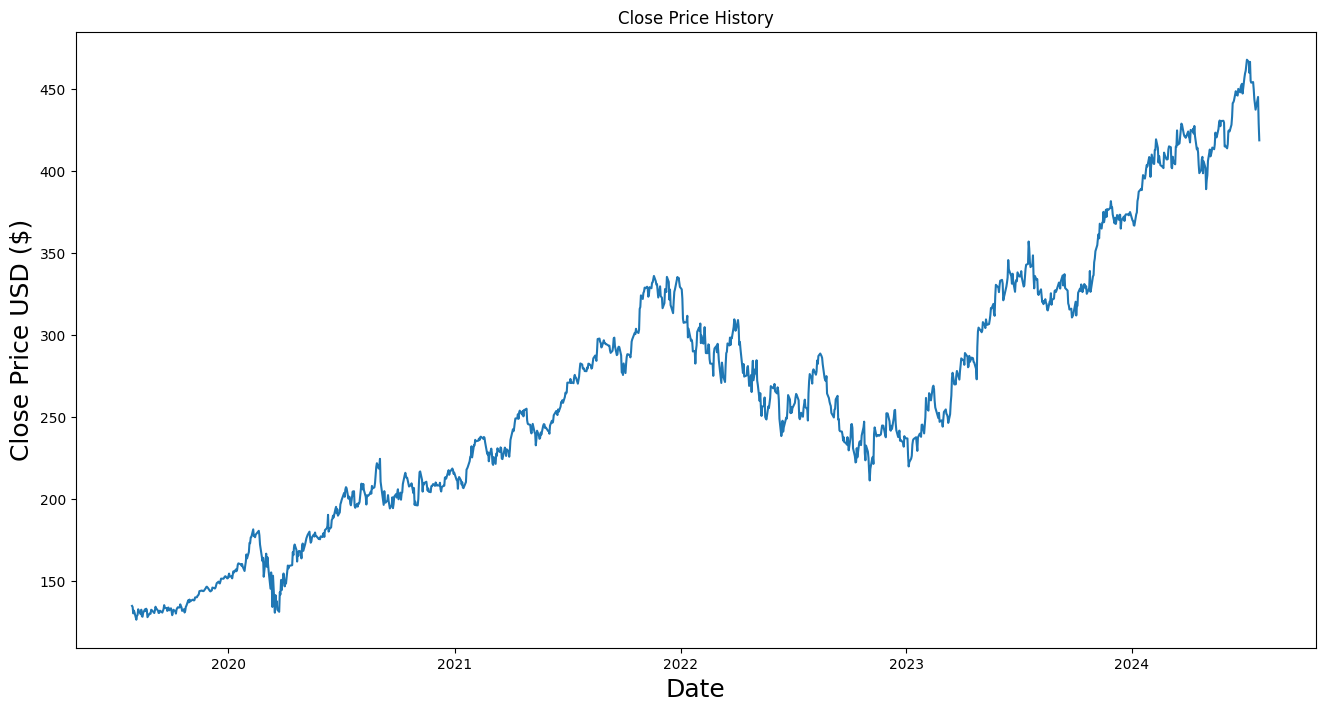

In [14]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel( 'Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [15]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_ratio = 0.8
training_data_len = math.ceil(len(dataset) * training_ratio)

training_data_len


1006

In [16]:
scaler = MinMaxScaler(feature_range = (-1,1))
scaled_data = scaler.fit_transform(dataset)

In [14]:
# create training data set 
# create the scaled training data set 

train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

# the number of past time steps (look-back period) that the model will use to predict the next value
n_lookback = 60 


for i in range (n_lookback, len(train_data)):
    x_train.append(train_data[i-n_lookback:i, 0])
    y_train.append(train_data[i, 0])

    if i <= n_lookback:
        print(x_train)
        print(y_train)

        print()

[array([-0.94900165, -0.9507332 , -0.95453146, -0.97732152, -0.96732308,
       -0.97380255, -1.        , -0.98614714, -0.98285169, -0.96268689,
       -0.96927807, -0.98000291, -0.96430655, -0.98762077, -0.98930237,
       -0.97557137, -0.96279342, -0.96923848, -0.96066389, -0.96632437,
       -0.99092753, -0.9793825 , -0.97775729, -0.97876602, -0.96441871,
       -0.96587599, -0.97607596, -0.96716481, -0.95360236, -0.95892644,
       -0.96778155, -0.97585173, -0.97562776, -0.96778155, -0.96890217,
       -0.97445057, -0.96851002, -0.96217703, -0.94788567, -0.95702097,
       -0.95870239, -0.96856605, -0.95746925, -0.9564607 , -0.96660436,
       -0.95931904, -0.97030351, -0.98386613, -0.97473093, -0.96441871,
       -0.97002333, -0.97814945, -0.96374647, -0.95892644, -0.95567603,
       -0.9564044 , -0.94508355, -0.95158473, -0.95561999, -0.96839803])]
[-0.9626816165950641]



In [15]:
# convert x_train and y_train into NumPy array 

x_train = np.array(x_train)
y_train = np.array(y_train)

In [16]:
# reshape the data x_train
# x_train.shape[0] = 1542
# x_train.shape[1] = 60 *n_lookback 

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(945, 60, 1)

In [17]:
# Build the LSTM Model 
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# Compile the model 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
model.fit(x_train, y_train, batch_size = 32, epochs = 25)

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0544
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0033
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0028
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0026
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0026
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0026
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0022
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0021
Epoch 9/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0019
Epoch 10/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0019
Epoch 11/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0022
Epoch 12/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0017
Epoch 13/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018
Epoch 14/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0015
Epoch 15/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0019
Epoc

In [20]:
# create the testing data set 
test_data = scaled_data [training_data_len - n_lookback: , :]

# create the data sets x_test and y_test 
x_test = []
y_test = dataset[training_data_len:, :]

for i in range (n_lookback, len(test_data)):
    x_test.append(test_data[i - n_lookback:i, 0])




In [21]:
# convert the data to a NumPy array
x_test = np.array(x_test)

In [22]:
# reshpae the x_test 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
# get the models predicted price value 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [24]:
# get the root mean squared error 

root_mean_squared_error = np.sqrt(np.mean(predictions - y_test)**2)
root_mean_squared_error 

4.871801247159798

/var/folders/41/shg4s91n7s55t3qz42lt86m80000gn/T/ipykernel_36922/1754579268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


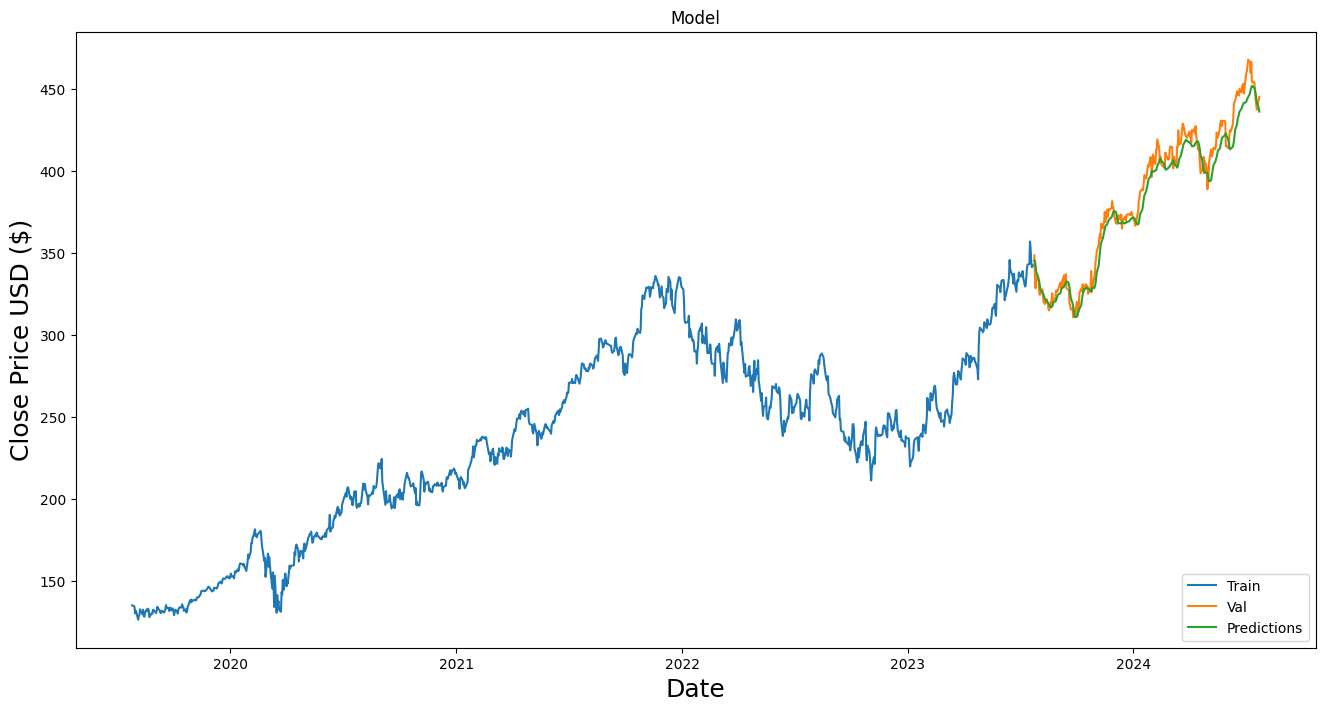

In [25]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8)) 
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [26]:
last_60_days = df['Close'].tail(60).values

print(last_60_days)

[405.58843994 401.52575684 388.6289978  394.22891235 397.12368774
 405.92782593 412.79544067 408.60299683 409.80084229 411.57763672
 413.99325562 412.97509766 415.80999756 423.07998657 420.98999023
 420.20999146 425.33999634 429.04000854 430.51998901 427.
 430.16000366 430.32000732 429.17001343 414.67001343 415.13000488
 413.51998901 416.07000732 424.01000977 424.51998901 423.8500061
 427.86999512 432.67999268 441.05999756 441.57998657 442.57000732
 448.36999512 446.33999634 445.70001221 449.77999878 447.67001343
 450.95001221 452.16000366 452.8500061  446.95001221 456.73001099
 459.27999878 460.76998901 467.55999756 466.23999023 459.54000854
 466.25       454.70001221 453.54998779 453.95999146 449.51998901
 443.51998901 440.36999512 437.10998535 442.94000244 444.8500061 ]


In [27]:
from tabulate import tabulate

last_60_days = scaled_data[-365:] 
input_seq = last_60_days.reshape(1, 365, 1)


predictions = []

for _ in range(7):

    predicted_price = model.predict(input_seq)
    
    predictions.append(scaler.inverse_transform(predicted_price).flatten()[0])

    input_seq = np.append(input_seq[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)



day_labels = [f"+ {i+1}" for i in range(7)]


predicted_df = pd.DataFrame({
    'Days': day_labels,
    'Predicted Price': predictions
})

print(tabulate(predicted_df, headers='keys', tablefmt='pretty', showindex=False))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
+------+--------------------+
| Days |  Predicted Price   |
+------+--------------------+
| + 1  | 434.7087097167969  |
| + 2  | 433.13116455078125 |
| + 3  | 431.2994079589844  |
| + 4  | 429.3656005859375  |
| + 5  | 427.40789794921875 |
| + 6  | 425.4666442871094  |
| + 7  | 423.5621032714844  |
+------+--------------------+
